Data Preprocessing

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier




In [ ]:
df=pd.read_csv(r"C:\Users\laksh\Downloads\Crop damage.csv")

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,Kharif,Alluvial,Insecticides,0.0,0.0,0.0,Summer,Minimal Damage
1,209,Kharif,Alluvial,Insecticides,0.0,0.0,0.0,Monsoon,Partial Damage
2,257,Kharif,Alluvial,Insecticides,0.0,0.0,0.0,Monsoon,Partial Damage
3,257,Kharif,Black-Cotton,Insecticides,0.0,0.0,0.0,Monsoon,Partial Damage
4,342,Kharif,Alluvial,Insecticides,0.0,0.0,0.0,Monsoon,Partial Damage
...,...,...,...,...,...,...,...,...,...
88853,3337,Kharif,Alluvial,Herbicides,10.0,12.0,44.0,Winter,Minimal Damage
88854,3516,Kharif,Alluvial,Herbicides,10.0,20.0,38.0,Summer,Minimal Damage
88855,3516,Kharif,Alluvial,Herbicides,15.0,40.0,8.0,Monsoon,Minimal Damage
88856,3702,Kharif,Alluvial,Herbicides,10.0,25.0,18.0,Winter,Minimal Damage


In [3]:
df.duplicated().sum()

1227

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df['Soil_Type'].unique()

array(['Alluvial', 'Black-Cotton'], dtype=object)

In [6]:
df['Crop_Type'].unique()

array(['Kharif', 'Rabi'], dtype=object)

In [7]:
df['Pesticide_Use_Category'].unique()

array(['Insecticides', 'Bactericides', 'Herbicides'], dtype=object)

In [8]:
df['Season'].unique()

array(['Summer', 'Monsoon', 'Winter'], dtype=object)

In [9]:
df['Crop_Damage'].unique()

array(['Minimal Damage', 'Partial Damage', 'Significant Damage'],
      dtype=object)

In [10]:
df.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

<Axes: >

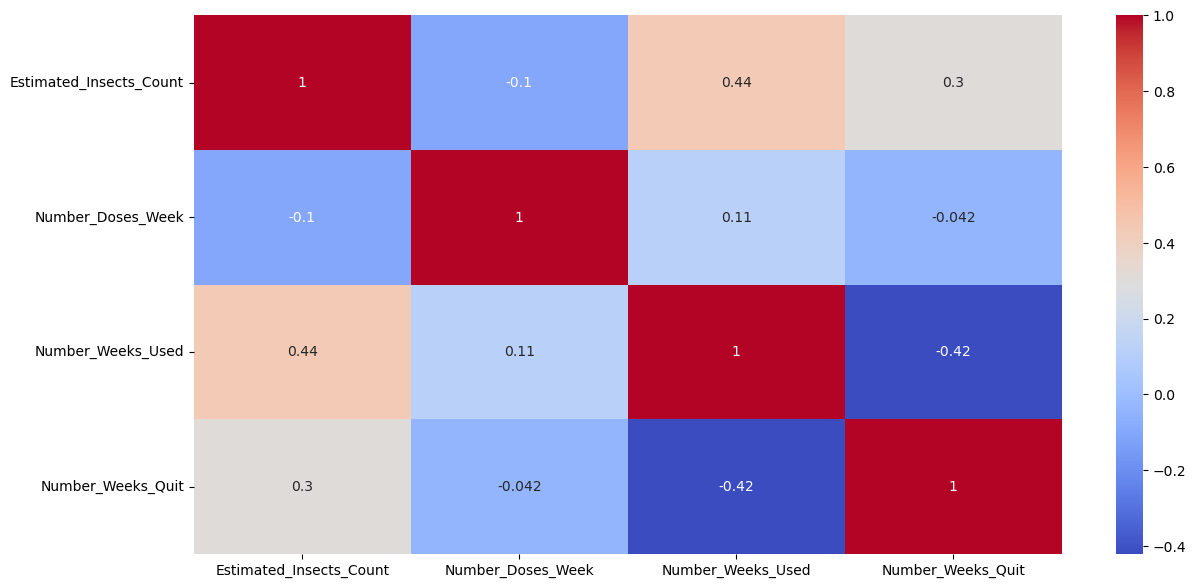

In [11]:
plt.figure(figsize=(14,7))
sns.heatmap(df.select_dtypes(['number']).corr(),annot=True,cmap='coolwarm')

In [12]:
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,Kharif,Alluvial,Insecticides,0.0,0.0,0.0,Summer,Minimal Damage
1,209,Kharif,Alluvial,Insecticides,0.0,0.0,0.0,Monsoon,Partial Damage
2,257,Kharif,Alluvial,Insecticides,0.0,0.0,0.0,Monsoon,Partial Damage
3,257,Kharif,Black-Cotton,Insecticides,0.0,0.0,0.0,Monsoon,Partial Damage
4,342,Kharif,Alluvial,Insecticides,0.0,0.0,0.0,Monsoon,Partial Damage


In [13]:
df.tail()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
88853,3337,Kharif,Alluvial,Herbicides,10.0,12.0,44.0,Winter,Minimal Damage
88854,3516,Kharif,Alluvial,Herbicides,10.0,20.0,38.0,Summer,Minimal Damage
88855,3516,Kharif,Alluvial,Herbicides,15.0,40.0,8.0,Monsoon,Minimal Damage
88856,3702,Kharif,Alluvial,Herbicides,10.0,25.0,18.0,Winter,Minimal Damage
88857,3895,Kharif,Alluvial,Herbicides,20.0,37.0,7.0,Winter,Minimal Damage


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87631 entries, 0 to 88857
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  87631 non-null  int64  
 1   Crop_Type                87631 non-null  object 
 2   Soil_Type                87631 non-null  object 
 3   Pesticide_Use_Category   87631 non-null  object 
 4   Number_Doses_Week        87630 non-null  float64
 5   Number_Weeks_Used        87629 non-null  float64
 6   Number_Weeks_Quit        87630 non-null  float64
 7   Season                   87631 non-null  object 
 8   Crop_Damage              87631 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 6.7+ MB


In [15]:
df.describe()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
count,87631.000000,87630.000000,87629.000000,87630.000000
mean,1398.804772,25.932957,28.600429,9.674221
std,849.521925,15.562394,12.304654,9.909530
min,150.000000,0.000000,0.000000,0.000000
25%,731.000000,15.000000,20.000000,0.000000
50%,1212.000000,20.000000,28.000000,7.000000
75%,1898.000000,40.000000,37.000000,16.000000
max,4097.000000,95.000000,67.000000,50.000000


In [16]:
df.shape

(87631, 9)

In [17]:
df.size

788679

In [18]:
df.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          1
Number_Weeks_Used          2
Number_Weeks_Quit          1
Season                     0
Crop_Damage                0
dtype: int64

In [7]:
df['Number_Doses_Week'].fillna(df['Number_Doses_Week'].mean(),inplace=True)
df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].mode()[0],inplace=True)
df['Number_Weeks_Quit'].fillna(df['Number_Weeks_Quit'].median(),inplace=True)
df.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [20]:
df.dtypes

Estimated_Insects_Count      int64
Crop_Type                   object
Soil_Type                   object
Pesticide_Use_Category      object
Number_Doses_Week          float64
Number_Weeks_Used          float64
Number_Weeks_Quit          float64
Season                      object
Crop_Damage                 object
dtype: object

In [21]:
df.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

<Axes: xlabel='Crop_Damage', ylabel='count'>

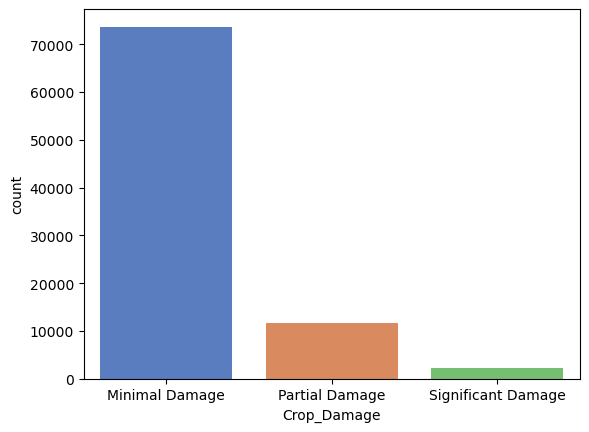

In [22]:
sns.countplot(data=df,x='Crop_Damage',palette='muted')

In [17]:
df2=df.groupby('Pesticide_Use_Category')['Crop_Damage'].apply(lambda x: x.value_counts().index[0]).reset_index()
df2

,Pesticide_Use_Category,Crop_Damage
0,Bactericides,Minimal Damage
1,Herbicides,Minimal Damage
2,Insecticides,Partial Damage


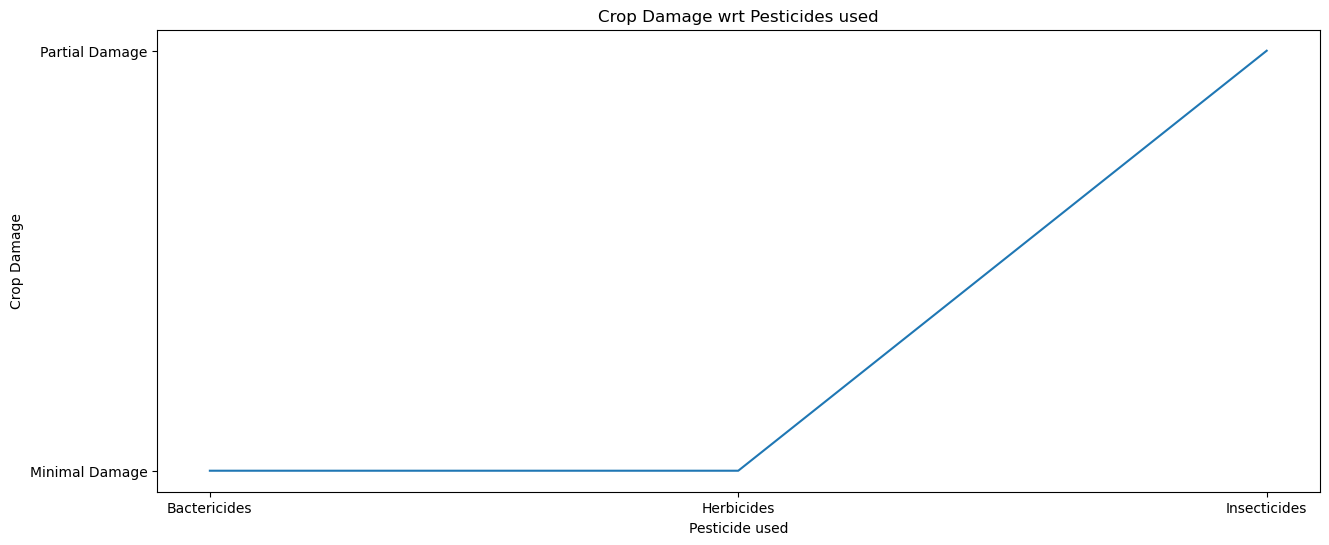

In [19]:
plt.figure(figsize=(15,6))
plt.plot(df2['Pesticide_Use_Category'],df2['Crop_Damage'])
plt.title("Crop Damage wrt Pesticides used")
plt.ylabel("Crop Damage")
plt.xlabel("Pesticide used")
plt.show()

Label Encoding

In [23]:
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
le4=LabelEncoder()
df['Crop_Type']=le1.fit_transform(df['Crop_Type'])
df['Soil_Type']=le2.fit_transform(df['Soil_Type'])
df['Pesticide_Use_Category']=le3.fit_transform(df['Pesticide_Use_Category'])
df['Season']=le4.fit_transform(df['Season'])
df

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,0,0,2,0.0,0.0,0.0,1,Minimal Damage
1,209,0,0,2,0.0,0.0,0.0,0,Partial Damage
2,257,0,0,2,0.0,0.0,0.0,0,Partial Damage
3,257,0,1,2,0.0,0.0,0.0,0,Partial Damage
4,342,0,0,2,0.0,0.0,0.0,0,Partial Damage
...,...,...,...,...,...,...,...,...,...
88853,3337,0,0,1,10.0,12.0,44.0,2,Minimal Damage
88854,3516,0,0,1,10.0,20.0,38.0,1,Minimal Damage
88855,3516,0,0,1,15.0,40.0,8.0,0,Minimal Damage
88856,3702,0,0,1,10.0,25.0,18.0,2,Minimal Damage


In [35]:
df1=pd.DataFrame([df['Number_Weeks_Quit'],df['Number_Weeks_Used']])
df1

,0,1,2,3,4,5,6,7,8,9,...,88848,88849,88850,88851,88852,88853,88854,88855,88856,88857
Number_Weeks_Quit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,16.0,36.0,15.0,44.0,38.0,8.0,18.0,7.0
Number_Weeks_Used,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,51.0,52.0,19.0,11.0,44.0,12.0,20.0,40.0,25.0,37.0


In [ ]:
plt.boxplot(df1)
plt.show()

In [26]:
x=df.drop('Crop_Damage',axis=1)
x

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,0,0,2,0.0,0.0,0.0,1
1,209,0,0,2,0.0,0.0,0.0,0
2,257,0,0,2,0.0,0.0,0.0,0
3,257,0,1,2,0.0,0.0,0.0,0
4,342,0,0,2,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
88853,3337,0,0,1,10.0,12.0,44.0,2
88854,3516,0,0,1,10.0,20.0,38.0,1
88855,3516,0,0,1,15.0,40.0,8.0,0
88856,3702,0,0,1,10.0,25.0,18.0,2


In [27]:
y=df['Crop_Damage']
y

0        Minimal Damage
1        Partial Damage
2        Partial Damage
3        Partial Damage
4        Partial Damage
              ...      
88853    Minimal Damage
88854    Minimal Damage
88855    Minimal Damage
88856    Minimal Damage
88857    Minimal Damage
Name: Crop_Damage, Length: 87631, dtype: object

Train-Test Split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_test.shape

(35053, 8)

In [30]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [31]:
rand=RandomForestClassifier(n_estimators=300)
rand.fit(x_train,y_train)

RandomForestClassifier(n_estimators=300)

In [32]:
ada=AdaBoostClassifier(n_estimators=50,learning_rate=0.3,random_state=42)
ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.3, random_state=42)

In [33]:
grad=GradientBoostingClassifier(n_estimators=150,random_state=42)
grad.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=150, random_state=42)

In [34]:
lst=[knn,rand,ada,grad]
for i in lst:
    print("Model name is:",i)
    y_pred=i.predict(x_test)
    print("*********************")
    print(confusion_matrix(y_test,y_pred))
    print("*******accuracy_score*******")
    print(accuracy_score(y_test,y_pred))
    print("*******classification_report*******")
    print(classification_report(y_test,y_pred))

Model name is: KNeighborsClassifier(n_neighbors=7)
*********************
[[28440   898    40]
 [ 3932   774    44]
 [  651   253    21]]
*******accuracy_score*******
0.8340227655264885
*******classification_report*******
                    precision    recall  f1-score   support

    Minimal Damage       0.86      0.97      0.91     29378
    Partial Damage       0.40      0.16      0.23      4750
Significant Damage       0.20      0.02      0.04       925

          accuracy                           0.83     35053
         macro avg       0.49      0.38      0.39     35053
      weighted avg       0.78      0.83      0.80     35053

Model name is: RandomForestClassifier(n_estimators=300)
*********************
[[28118  1112   148]
 [ 3902   697   151]
 [  660   241    24]]
*******accuracy_score*******
0.8227255869683051
*******classification_report*******
                    precision    recall  f1-score   support

    Minimal Damage       0.86      0.96      0.91     29378
    Parti

In [35]:
ac=pd.DataFrame({'test_acc':[knn.score(x_test,y_test),rand.score(x_test,y_test),ada.score(x_test,y_test),grad.score(x_test,y_test)],'train_acc':[knn.score(x_train,y_train),rand.score(x_train,y_train),ada.score(x_train,y_train),grad.score(x_train,y_train)]},index=['KNN Classifier','Random Forest Classifier','Ada Boost Classifier','Gradient Boost Classifier'])
ac

,test_acc,train_acc
KNN Classifier,0.834023,0.859770
Random Forest Classifier,0.822726,0.988303
Ada Boost Classifier,0.841126,0.845658
Gradient Boost Classifier,0.844293,0.850831


Gradient Boost Classifier gives the best accuracy

In [37]:
# user input
i=input("Estimated_Insects_Count:")
c=input("Crop_Type(Rabi/Kharif):")
c=le1.transform([c])
soil=input("Soil_Type(Alluvial/Black-Cotton):")
soil=le2.transform([soil])
p=input("Pesticide_Use_Category(Insecticides/Bactericides/Herbicides):")
p=le3.transform([p])
d=input("Number_Doses_Week:")
u=input("Number_Weeks_Used:")
q=input("Number_Weeks_Quit:")
s=input("Season(Summer/Monsoon/Winter):")
s=le4.transform([s])


Estimated_Insects_Count: 200
Crop_Type(Rabi/Kharif): Rabi
Soil_Type(Alluvial/Black-Cotton): Alluvial
Pesticide_Use_Category(Insecticides/Bactericides/Herbicides): Insecticides
Number_Doses_Week: 12
Number_Weeks_Used: 10
Number_Weeks_Quit: 2
Season(Summer/Monsoon/Winter): Monsoon


In [38]:
input_=np.array([[i,c[0],soil[0],p[0],d,u,q,s[0]]])
input1=scaler.transform(input_)
grad.predict(input1)

array(['Minimal Damage'], dtype=object)